uint8


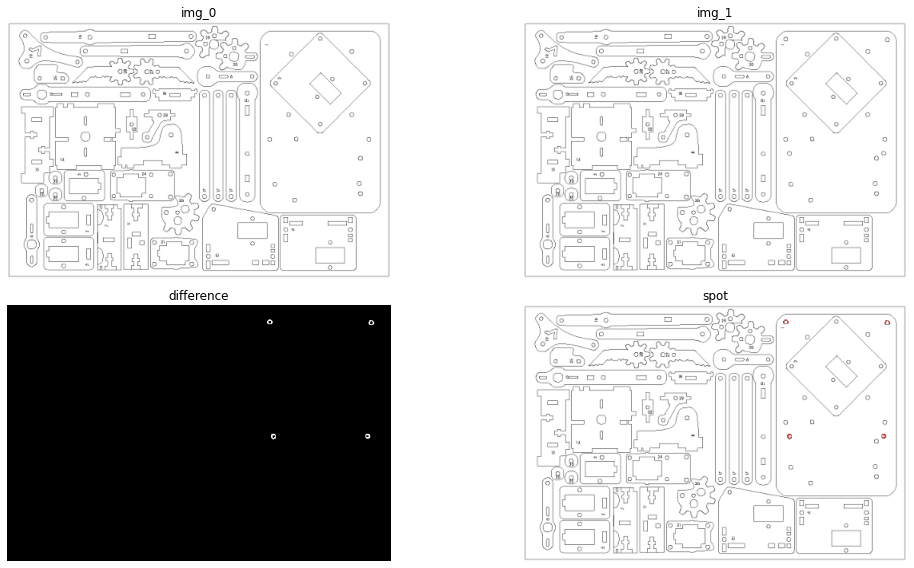

In [2]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# path = '/content/drive/My Drive/[10]Lecture/ImageProcessing/Images'
# fstr_0 = os.path.join(path,'robot_arm0.jpg')
# fstr_1 = os.path.join(path,'robot_arm1.jpg')

path = "../../../images"
fstr_0 = os.path.join(path, "robot_arm0.jpg")
fstr_1 = os.path.join(path, "robot_arm1.jpg")

img_0 = cv2.imread(fstr_0, cv2.IMREAD_GRAYSCALE)
img_1 = cv2.imread(fstr_1, cv2.IMREAD_GRAYSCALE)
img_0_color = cv2.imread(fstr_0)
img_1_color = cv2.imread(fstr_1)



diff = cv2.absdiff(img_0, img_1)

diff[diff>=10] = 255
print(diff.dtype)
diff_red = cv2.cvtColor(diff,cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

spot = cv2.bitwise_xor(img_1_color,diff_red)

imgs = {'img_0':img_0_color, 'img_1':img_1_color, 'difference':diff,'spot':spot}

plt.figure(figsize=[16,8])
for idx, (title, img) in enumerate(imgs.items()):
  plt.subplot(2,2,idx+1)
  plt.title(title)
  plt.axis('off')
  if img.ndim >2: 
    plt.imshow(img[:,:,::-1])
  else:
    plt.imshow(img,cmap=plt.cm.gray)
plt.tight_layout()
plt.show()

(279, 283)
(279, 283)


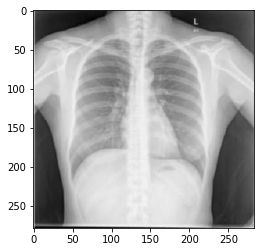

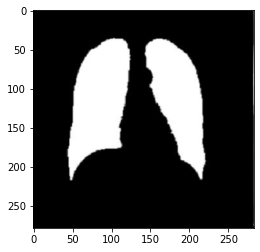

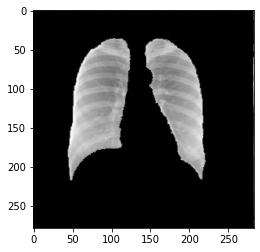

In [74]:
fstr_0 = os.path.join(path,'Lung.jpg')
fstr_1 = os.path.join(path,'Lung_mask.png')
img  = cv2.imread(fstr_0,cv2.IMREAD_GRAYSCALE)
mask = cv2.imread(fstr_1,cv2.IMREAD_GRAYSCALE) 

plt.figure()
plt.imshow(img,cmap=plt.cm.gray)
plt.figure()
plt.imshow(mask,cmap=plt.cm.gray)
print(img.shape)
print(mask.shape)

#_, mask = cv2.threshold(mask,254,255,cv2.THRESH_BINARY)
masked_roi = cv2.bitwise_and(img,mask)


plt.figure()
plt.imshow(masked_roi,cmap=plt.cm.gray)
plt.show()


(279, 850, 3)
5


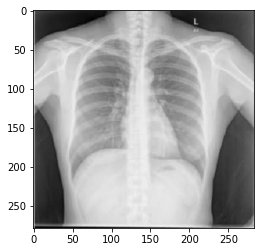

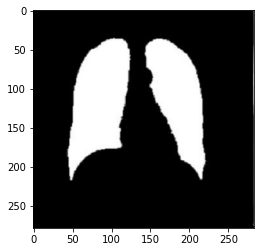

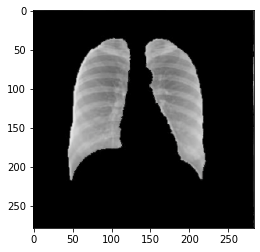

True

In [64]:
fstr_0 = os.path.join(path,'Lung-ROI-segmentation.png')
img = cv2.imread(fstr_0)
print(img.shape)
l = np.hsplit(img,(283,284,567,568))
print(len(l))
plt.figure()
plt.imshow(l[0])
plt.figure()
plt.imshow(l[2])
plt.figure()
plt.imshow(cv2.bitwise_and(l[0],l[2]))
plt.show()
fstr_0 = os.path.join(path,'Lung.jpg')
cv2.imwrite(fstr_0, cv2.cvtColor(l[0],cv2.COLOR_BGR2GRAY))

g = cv2.cvtColor(l[2],cv2.COLOR_BGR2GRAY)
_, gb = cv2.threshold(g,1,255,cv2.THRESH_BINARY)
mask = cv2.cvtColor(g,cv2.COLOR_GRAY2BGR)

fstr_0 = os.path.join(path,'Lung_mask.png')
cv2.imwrite(fstr_0,l[2])
